In [2]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib
The scikit-learn version is 0.19.0.


In [5]:
cal_housing = pd.read_csv('datasets/cal_housing.data', names=('longitude',
                                                              'latitude',
                                                              'housingMedianAge',
                                                              'totalRooms',
                                                             'totalBedrooms',
                                                             'population',
                                                             'households',
                                                             'medianIncome',
                                                             'medianHouseValue'))

In [33]:
print(cal_housing.head())

   longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0    -122.23     37.88              41.0       880.0          129.0   
1    -122.22     37.86              21.0      7099.0         1106.0   
2    -122.24     37.85              52.0      1467.0          190.0   
3    -122.25     37.85              52.0      1274.0          235.0   
4    -122.25     37.85              52.0      1627.0          280.0   

   population  households  medianIncome  medianHouseValue  roomsPerHousehold  \
0       322.0       126.0        8.3252          452600.0           6.984127   
1      2401.0      1138.0        8.3014          358500.0           6.238137   
2       496.0       177.0        7.2574          352100.0           8.288136   
3       558.0       219.0        5.6431          341300.0           5.817352   
4       565.0       259.0        3.8462          342200.0           6.281853   

   bedroomsPerRooms  popPerHousehold  
0          0.146591         2.555556  
1          0.1

In [5]:
# cal_housing['medianHouseValue'].describe()
# spot empty values
# cal_housing.count()
cal_housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude           20640 non-null float64
latitude            20640 non-null float64
housingMedianAge    20640 non-null float64
totalRooms          20640 non-null float64
totalBedrooms       20640 non-null float64
population          20640 non-null float64
households          20640 non-null float64
medianIncome        20640 non-null float64
medianHouseValue    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [15]:

#cal_housing.hist(bins=50, figsize=(20,15))

# pearson correlation
corr_mat = cal_housing.corr()
print(corr_mat['medianHouseValue'])

longitude           -0.045967
latitude            -0.144160
housingMedianAge     0.105623
totalRooms           0.134153
totalBedrooms        0.050594
population          -0.024650
households           0.065843
medianIncome         0.688075
medianHouseValue     1.000000
roomsPerHousehold    0.151948
bedroomsPerRooms    -0.255624
popPerHousehold     -0.023737
Name: medianHouseValue, dtype: float64


In [6]:
cal_housing["roomsPerHousehold"] = cal_housing["totalRooms"]/cal_housing["households"]
cal_housing["bedroomsPerRooms"] = cal_housing["totalBedrooms"]/cal_housing["totalRooms"]
cal_housing["popPerHousehold"]= cal_housing["population"]/cal_housing["households"]

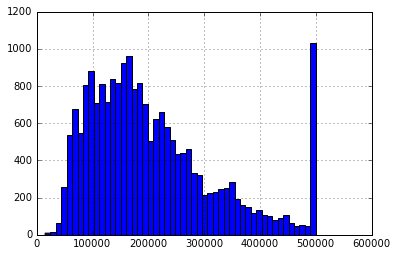

In [10]:

import matplotlib.pyplot as plt
cal_housing['medianHouseValue'].hist(bins=50)

# cal_housing['medianHouseValue'].apply(np.lo/g10).hist(bins=50)


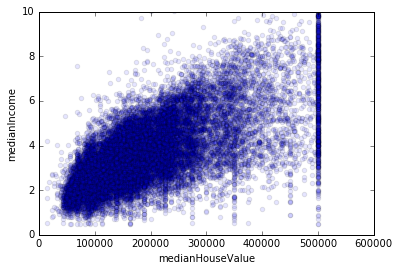

In [8]:

cal_housing.loc[:,['medianHouseValue','medianIncome']].plot.scatter(
    x="medianHouseValue",
    y="medianIncome",
    ylim=(0,10), 
    xlim=(0,600000), alpha=0.1)

In [7]:
num_rows = cal_housing.shape[0]
rows = np.random.randint(num_rows, size=2000)

cal_housing.iloc[rows[:1000]].loc[:,['medianHouseValue','medianIncome']].plot.scatter(
    x="medianHouseValue",
    y="medianIncome",
    ylim=(0,10), 
    xlim=(0,600000), alpha=0.4)



# Cost Function for Linear regression


** Root Mean Squared Error **

$$
RMSE(\mathbf{X},h)= \sqrt{\frac{1}{m} \sum_{i=1}^{m}(h(\mathbf{x}_{i}) - y_{i})^2}
$$

In [22]:
np.array( cal_housing.iloc[ rows[:1000]].loc[:,['medianIncome','bedroomsPerRooms']])

array([[ 3.1858    ,  0.20969697],
       [ 5.8691    ,  0.18338109],
       [ 7.642     ,  0.1573762 ],
       ..., 
       [ 3.2727    ,  0.21765417],
       [ 2.212     ,  0.22236728],
       [ 1.6429    ,  0.21752669]])

In [28]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import cross_val_predict

lin_model = linear_model.LinearRegression()

X_train = np.array( cal_housing.iloc[ rows[:1000]].loc[:,['medianIncome','bedroomsPerRooms']])
Y_train = np.array(cal_housing.iloc[rows[:1000]].loc[:,'medianHouseValue'] )

X_test = np.array( cal_housing.iloc[ rows[1000:]].loc[:,['medianIncome','bedroomsPerRooms']])
Y_test = np.array(cal_housing.iloc[rows[1000:]].loc[:,'medianHouseValue'] )

lin_model.fit( X_train,Y_train)

print("Coefficients: \n",lin_model.coef_)

Y_pred = lin_model.predict(X_test)
# print("RMSE: %.2f" % mean_squared_error(Y_test, Y_pred))

# pred = cross_val_predict(lin_model, X, Y, cv=10 )

print(Y_test[:4])
print(Y_pred[:4])



Coefficients: 
 [  46701.40091968  428762.19402895]
[ 342800.   45800.  206300.  103500.]
[ 300342.50364362  151667.62375868  167549.03360879  151822.00126438]


In [24]:
X_test.shape
Y_test.shape
#plt.scatter(X_test, Y_test, color='black', alpha=0.2)

(1000,)

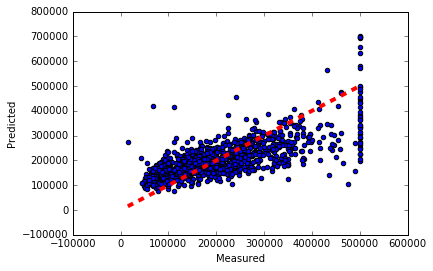

In [29]:
fig, ax = plt.subplots()
ax.scatter(Y, pred, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4, color='r')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [3]:
car_maker = pd.read_csv('datasets/cars.csv')


# print(car_maker.head())

car_maker.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
mpg             261 non-null float64
 cylinders      261 non-null int64
 cubicinches    261 non-null object
 hp             261 non-null int64
 weightlbs      261 non-null object
 time-to-60     261 non-null int64
 year           261 non-null int64
 brand          261 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [24]:
from sklearn import tree

n = car_maker.shape[0]
ind = np.random.permutation(n)
test_size = int(n * 0.20)
train_x = car_maker.iloc[ind[test_size:]].loc[:,['mpg', 
                                                 ' cylinders', 
                                                 ' cubicinches', 
                                                 ' hp', 
                                                 ' weightlbs',
                                                 ' time-to-60']]

train_x.shape




# train_y = car_maker.iloc[ind[test_size:]].loc[:,' brand']

print(np.array(train_x))
# clf = tree.DecisionTreeClassifier()

# clf = clf.fit(np.array(train_x), np.array(train_y))

[[21.0 6 '231' 110 '3039' 15]
 [33.5 4 '98' 83 '2075' 16]
 [20.0 4 '114' 91 '2582' 14]
 ..., 
 [16.0 8 '351' 149 '4335' 15]
 [28.0 4 '120' 79 '2625' 19]
 [25.0 4 '121' 115 '2671' 14]]
